<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/choixSejourLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séjours dans le flou avec skfuzzy

L'objectif est de pouvoir représenter des règles de type :
- SI le beau temps est prévu ALORS j’achète l’offre de location pour une longue durée
- SI le beau temps est prévu et que le loyer est cher ALORS j’achète l’offre de location pour une moyenne durée
- SI le temps est de moyen à beau, ET que la location reste abordable, ALORS j’achète l’offre pour une moyenne durée
- SI le temps prévu est mauvais, MAIS que la location est très abordable, ALORS j’achète l’offre pour une courte durée
- le reste du temps, SI la location est chère ET qu’il ne fait pas beau, ALORS je n’y vais pas ; de même SI la location est dans des prix abordable MAIS qu’il fait mauvais

Une partie du code est absent, référez-vous  l'exemple sur la logique floue et le freinage pour compléter ce code...

On utilise pour cela la librairie python skfuzzy
*(si elle n'est pas présente, installez là avec cette ligne : !pip install -U scikit-fuzzy)*

In [1]:
 !pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (0.4.2)


In [2]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions (ici la météo, le coût)
- les conséquents sont les déductions (ici la durée de séjour)

In [3]:
#### Antecedent et Consequent
# la temperature est située dans un intervale de 0 à 40 coupé par pas de 1 
meteo = ctrl.Antecedent(...
# l'offre de séjour est située dans un intervale de 20 à 200€ la nuit, coupé par pas de 5
offre = ctrl.Antecedent(...
# la durée de séjour est située dans un intervale de 0 (aucun) à 5 coupé par pas de 1 
duree = ctrl.Consequent(...

### intervales
on définit ensuite les intervales utilisés dans les antécédents et les conséquents.
#### La météo
- le temps est beau à partir de 22°, moyen à partir de 15°, frais en dessous


In [4]:
#une courbe trapezoïdale, moche=1 jusque 11°, moche=0 à partir de 15°
meteo_moche = fuzz.trapmf(...
#une courbe trapezoïdale, moyenne=0 jusque 13°, moyenne=1 à partir de 15°, à 0 à partir de 20°
meteo_moyenne = ...
#une courbe trapezoïdale, belle=0 jusque 20°, belle=1 à partir de 22°
meteo_belle = ...
meteo['moche'] = meteo_moche
meteo['moyenne'] = meteo_moyenne
meteo['belle'] = meteo_belle


On peut vérifier les courbes d'appartenance : 
- *ici les courbes sont trapézoidales, mais vous pouvez les définir autrement*

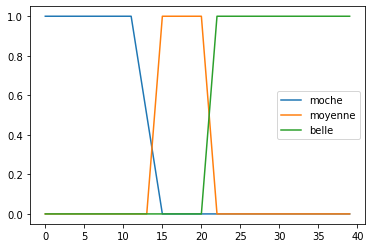

In [5]:
plt.plot(meteo.universe, meteo_moche,  label='moche')
plt.plot(meteo.universe, meteo_moyenne,label='moyenne')
plt.plot(meteo.universe, meteo_belle,  label='belle')
plt.legend()
plt.show()


#### Le coût
- une offre sous 30€ la nuit est très abordable, elle reste abordable jusque 70€, elle est ressentie comme chère ensuite

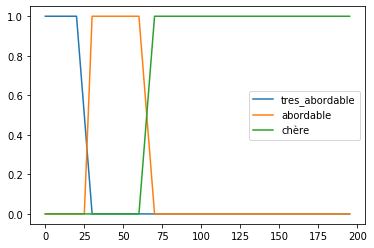

In [6]:
cout_faible = fuzz.trapmf(...
cout_moyen = ...
cout_eleve = ...
offre['tres_abordable'] = cout_faible
offre['abordable'] = cout_moyen
offre['chere'] = cout_eleve
#juste pour voir les courbes
plt.plot(offre.universe, cout_faible, label='tres_abordable')
plt.plot(offre.universe, cout_moyen,  label='abordable')
plt.plot(offre.universe, cout_eleve,  label='chère')
plt.legend()
plt.show()

#### La durée
- une durée de séjour est considérée longue à partir de 3j
- une durée est moyenne entre 2j et 3j
- une courte durée tient de 1j à 2j
- ne pas partir reviens à une durée de 0j à 1j



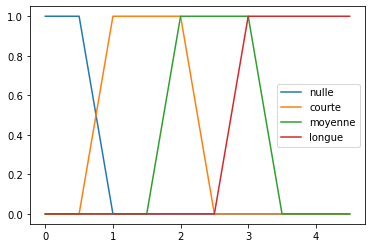

In [7]:
duree_nulle = ...
duree_courte = ...
duree_moyenne = ...
duree_longue = ...
duree['nulle'] = duree_nulle
duree['courte'] = duree_courte
duree['moyenne'] = duree_moyenne
duree['longue'] = duree_longue
#juste pour voir les courbes
plt.plot(duree.universe, duree_nulle,  label='nulle')
plt.plot(duree.universe, duree_courte, label='courte')
plt.plot(duree.universe, duree_moyenne,label='moyenne')
plt.plot(duree.universe, duree_longue, label='longue')
plt.legend()
plt.show()

## Définition des règles floues
Rappel, on souhaite définir : 
- si le beau temps est prévu alors j’achète l’offre de location pour une longue durée
- si le temps est de moyen, et que la location reste abordable, alors j’achète l’offre pour une moyenne durée
- si le temps prévu est mauvais, mais que la location est très abordable, alors j’achète l’offre pour une courte durée
- le reste du temps, si la location est chère et qu’il ne fait pas beau, je n’y vais pas ; de même si la location est dans des prix abordable mais qu’il fait mauvais



In [10]:
#on écrit
rule1a =  ctrl.Rule( ...
rule1b =  
rule2 = 
rule3 = 
rule4a =
rule4b =
rule4c =



#on compile les règles
sejour_regles = ctrl.ControlSystem([rule1a, rule1b, rule2, rule3, rule4a, rule4b, rule4c])
sejour_decision = ctrl.ControlSystemSimulation(sejour_regles)

## Observations
Testons le système : 
- une offre à 70€ est repérée et la météo annonce 17°, quelle est la décision à prendre ?

In [11]:
sejour_decision.input['meteo'] = 17
sejour_decision.input['offre'] = 70

sejour_decision.compute()

print(sejour_decision.output['duree'])

0.38888888888888884


la durée est <0.5, ce qui correspond à une durée nulle.

Vérifions en image :

/Users/emmanueladam/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


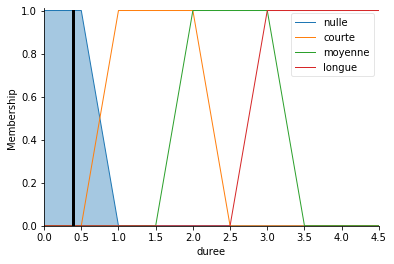

In [12]:
duree.view(sim=sejour_decision)

Que se passe-t-il lorsqu'une offre est trouvée à 80€ mais que la météo annonce 30° ?


In [13]:
sejour_decision.input['meteo'] = 30
sejour_decision.input['offre'] = 80

sejour_decision.compute()

print(sejour_decision.output['duree'])

2.4999999999999996


une durée de séjour longue est recomandée. vérification en image :

/Users/emmanueladam/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


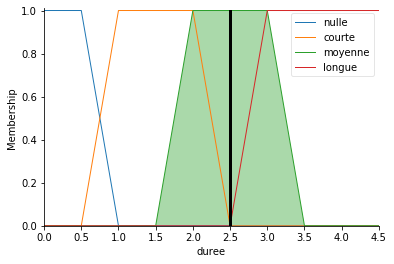

In [14]:
duree.view(sim=sejour_decision)

#### Impact des courbes
- Changez les courbes pour étudier l'impact sur le résultat